## Python EDA

#### Basic Communication

In [83]:
import pandas as pd

# Load the dataset
file_path = r"/Users/emmanuel_bamidele/Desktop/Bamspace/Data_Science_Tutorial/Books/Software for STEM Grad Students/Data/EDA_global_education_data.csv"

education_data = pd.read_csv(file_path, encoding='ISO-8859-1')

education_data.head() #view the top five lines


,Countries and areas,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
0,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,44,...,13,11,0,0,74,56,32.49,104.0,9.7,11.12
1,Albania,41.153332,20.168331,4,2,6,3,6,1,21,...,0,0,48,58,99,100,11.78,107.0,55.0,12.33
2,Algeria,28.033886,1.659626,0,0,0,0,0,0,0,...,0,0,21,19,98,97,24.28,109.9,51.4,11.70
3,Andorra,42.506285,1.521801,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7.20,106.4,0.0,0.00
4,Angola,11.202692,17.873887,31,39,0,0,0,0,0,...,0,0,0,0,0,0,40.73,113.5,9.3,6.89


In [85]:
# Basic information about the dataset
print(education_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Countries and areas                      202 non-null    object 
 1   Latitude                                 202 non-null    float64
 2   Longitude                                202 non-null    float64
 3   OOSR_Pre0Primary_Age_Male                202 non-null    int64  
 4   OOSR_Pre0Primary_Age_Female              202 non-null    int64  
 5   OOSR_Primary_Age_Male                    202 non-null    int64  
 6   OOSR_Primary_Age_Female                  202 non-null    int64  
 7   OOSR_Lower_Secondary_Age_Male            202 non-null    int64  
 8   OOSR_Lower_Secondary_Age_Female          202 non-null    int64  
 9   OOSR_Upper_Secondary_Age_Male            202 non-null    int64  
 10  OOSR_Upper_Secondary_Age_Female          202 non-n

In [86]:
# Summary statistics for numerical columns
print(education_data.describe())

        Latitude    Longitude  OOSR_Pre0Primary_Age_Male  \
count  202.000000  202.000000                 202.000000   
mean    25.081422   55.166928                  19.658416   
std     16.813639   45.976287                  25.007604   
min      0.023559    0.824782                   0.000000   
25%     11.685062   18.665678                   0.000000   
50%     21.207861   43.518091                   9.000000   
75%     39.901792   77.684945                  31.000000   
max     64.963051  178.065032                  96.000000   

       OOSR_Pre0Primary_Age_Female  OOSR_Primary_Age_Male  \
count                   202.000000             202.000000   
mean                     19.282178               5.282178   
std                      25.171147               9.396442   
min                       0.000000               0.000000   
25%                       0.000000               0.000000   
50%                       7.000000               1.000000   
75%                      30.0000

In [87]:
# Checking for missing values
print(education_data.isnull().sum())

Countries and areas                        0
Latitude                                   0
Longitude                                  0
OOSR_Pre0Primary_Age_Male                  0
OOSR_Pre0Primary_Age_Female                0
OOSR_Primary_Age_Male                      0
OOSR_Primary_Age_Female                    0
OOSR_Lower_Secondary_Age_Male              0
OOSR_Lower_Secondary_Age_Female            0
OOSR_Upper_Secondary_Age_Male              0
OOSR_Upper_Secondary_Age_Female            0
Completion_Rate_Primary_Male               0
Completion_Rate_Primary_Female             0
Completion_Rate_Lower_Secondary_Male       0
Completion_Rate_Lower_Secondary_Female     0
Completion_Rate_Upper_Secondary_Male       0
Completion_Rate_Upper_Secondary_Female     0
Grade_2_3_Proficiency_Reading              0
Grade_2_3_Proficiency_Math                 0
Primary_End_Proficiency_Reading            0
Primary_End_Proficiency_Math               0
Lower_Secondary_End_Proficiency_Reading    0
Lower_Seco

In [ ]:
# Example: Filling missing values
education_data['COLUMN_NAME'] = education_data['COLUMN_NAME'].fillna(method='ffill')

In [88]:
# Removing duplicate rows if any
education_data = education_data.drop_duplicates()

In [ ]:
# Converting data types if necessary
education_data['NUMERIC_COLUMN'] = pd.to_numeric(education_data['NUMERIC_COLUMN'], errors='coerce')

In [95]:
# Checking for any obvious inconsistencies or anomalies in the data (e.g., 
# negative values in columns where it doesn't make sense)
anomalies = {}
for column in education_data.columns:
    # Check for negative values in columns that should only have positive values
    if education_data[column].dtype in ['int64', 'float64'] and not column in ['Latitude', 'Longitude']:
        anomalies[column] = education_data[education_data[column] < 0][column].count()

anomalies

{'Latitude ': 0,
 'OOSR_Pre0Primary_Age_Male': 0,
 'OOSR_Pre0Primary_Age_Female': 0,
 'OOSR_Primary_Age_Male': 0,
 'OOSR_Primary_Age_Female': 0,
 'OOSR_Lower_Secondary_Age_Male': 0,
 'OOSR_Lower_Secondary_Age_Female': 0,
 'OOSR_Upper_Secondary_Age_Male': 0,
 'OOSR_Upper_Secondary_Age_Female': 0,
 'Completion_Rate_Primary_Male': 0,
 'Completion_Rate_Primary_Female': 0,
 'Completion_Rate_Lower_Secondary_Male': 0,
 'Completion_Rate_Lower_Secondary_Female': 0,
 'Completion_Rate_Upper_Secondary_Male': 0,
 'Completion_Rate_Upper_Secondary_Female': 0,
 'Grade_2_3_Proficiency_Reading': 0,
 'Grade_2_3_Proficiency_Math': 0,
 'Primary_End_Proficiency_Reading': 0,
 'Primary_End_Proficiency_Math': 0,
 'Lower_Secondary_End_Proficiency_Reading': 0,
 'Lower_Secondary_End_Proficiency_Math': 0,
 'Youth_15_24_Literacy_Rate_Male': 0,
 'Youth_15_24_Literacy_Rate_Female': 0,
 'Birth_Rate': 0,
 'Gross_Primary_Education_Enrollment': 0,
 'Gross_Tertiary_Education_Enrollment': 0,
 'Unemployment_Rate': 0,
 'Prim

In [96]:
# Feature Engineering: Creating new features for gender disparity

# Calculating gender disparities in various educational metrics
education_data['Disparity_Primary_Completion'] = education_data['Completion_Rate_Primary_Male'] - education_data['Completion_Rate_Primary_Female']
education_data['Disparity_Literacy_Rate'] = education_data['Youth_15_24_Literacy_Rate_Male'] - education_data['Youth_15_24_Literacy_Rate_Female']
education_data['Disparity_OOSR_Primary'] = education_data['OOSR_Primary_Age_Male'] - education_data['OOSR_Primary_Age_Female']

# Display the first few rows of the dataset with the new features
education_data[['Countries and areas', 'Disparity_Primary_Completion', 'Disparity_Literacy_Rate', 'Disparity_OOSR_Primary']].head()


,Countries and areas,Disparity_Primary_Completion,Disparity_Literacy_Rate,Disparity_OOSR_Primary
0,Afghanistan,27,18,0
1,Albania,-2,-1,3
2,Algeria,0,1,0
3,Andorra,0,0,0
4,Angola,6,0,0


In [106]:
# Performing real analysis on the dataset for variation

# Calculating standard deviation
std_dev = education_data[['Youth_15_24_Literacy_Rate_Male', 'Youth_15_24_Literacy_Rate_Female', 
                          'Gross_Primary_Education_Enrollment', 'Gross_Tertiary_Education_Enrollment']].std()



std_dev

Youth_15_24_Literacy_Rate_Male         45.535186
Youth_15_24_Literacy_Rate_Female       45.249643
Gross_Primary_Education_Enrollment     29.769338
Gross_Tertiary_Education_Enrollment    29.978206
dtype: float64

In [107]:
# Performing real analysis on the dataset for variation

# Calculating variance for key metrics

variance = education_data[['Youth_15_24_Literacy_Rate_Male', 'Youth_15_24_Literacy_Rate_Female', 
                           'Gross_Primary_Education_Enrollment', 'Gross_Tertiary_Education_Enrollment']].var()

variance

Youth_15_24_Literacy_Rate_Male         2073.453130
Youth_15_24_Literacy_Rate_Female       2047.530196
Gross_Primary_Education_Enrollment      886.213502
Gross_Tertiary_Education_Enrollment     898.692830
dtype: float64

In [108]:
# Performing real analysis on the dataset for covariation

# Calculating the correlation matrix for the same set of metrics
correlation_matrix = education_data[['Youth_15_24_Literacy_Rate_Male', 'Youth_15_24_Literacy_Rate_Female', 
                                     'Gross_Primary_Education_Enrollment', 
                                     'Gross_Tertiary_Education_Enrollment']].corr()

correlation_matrix

,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment
Youth_15_24_Literacy_Rate_Male,1.000000,0.996766,0.176601,0.028501
Youth_15_24_Literacy_Rate_Female,0.996766,1.000000,0.176927,0.043842
Gross_Primary_Education_Enrollment,0.176601,0.176927,1.000000,0.283959
Gross_Tertiary_Education_Enrollment,0.028501,0.043842,0.283959,1.000000


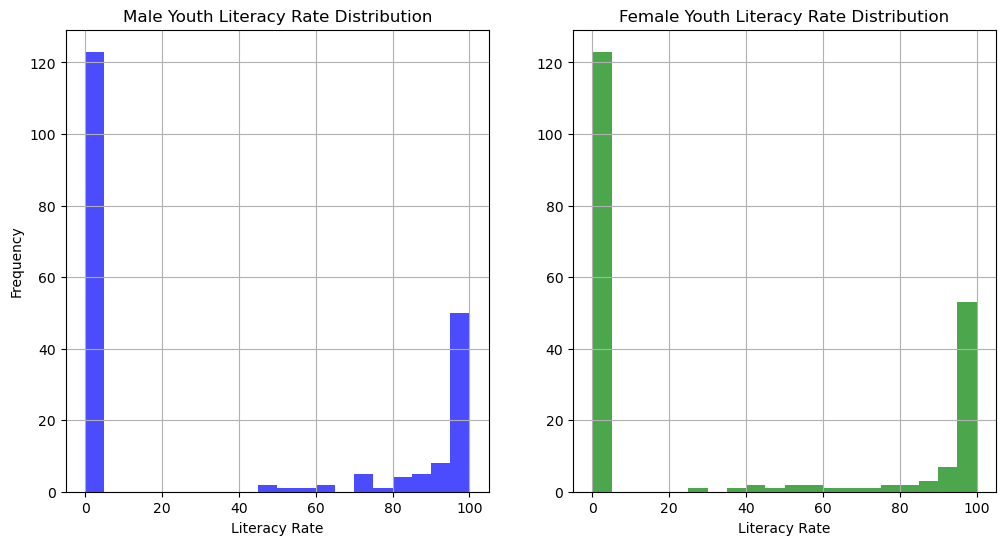

In [109]:
import seaborn as sns

# Visualization to illustrate the disparities and correlations

# Plotting histograms for literacy rates
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
education_data['Youth_15_24_Literacy_Rate_Male'].hist(bins=20, color='blue', alpha=0.7)
plt.title('Male Youth Literacy Rate Distribution')
plt.xlabel('Literacy Rate')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
education_data['Youth_15_24_Literacy_Rate_Female'].hist(bins=20, color='green', alpha=0.7)
plt.title('Female Youth Literacy Rate Distribution')
plt.xlabel('Literacy Rate')
plt.show()


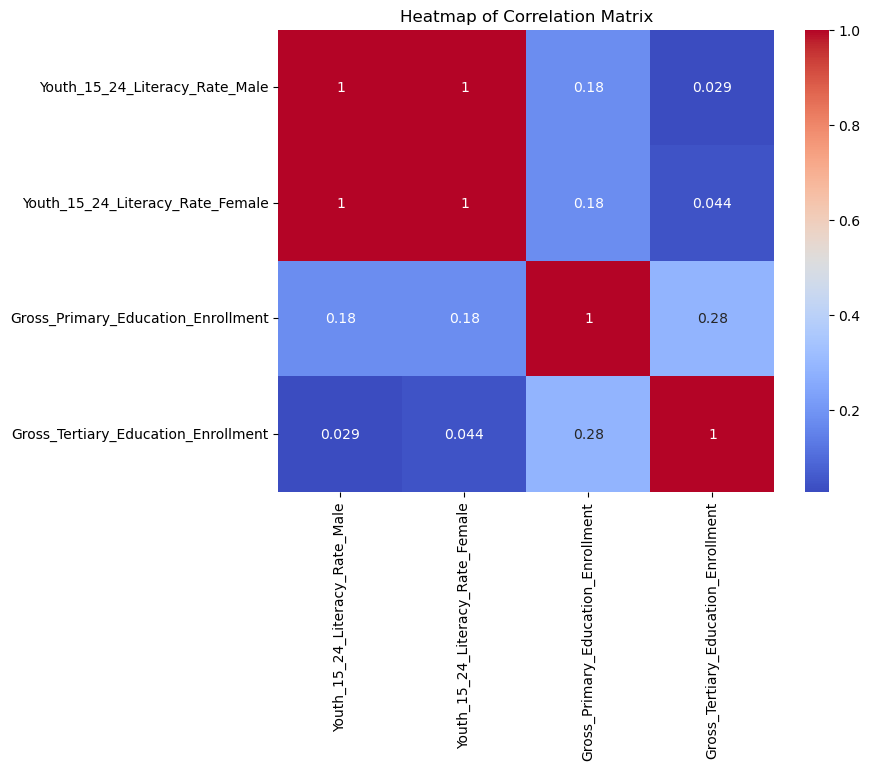

In [110]:

# Plotting a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [ ]:
# Categorical Variables
#Example of one-hot encoding
education_data['Region'] = ['Asia', 'Europe', 'Africa', 'Asia']  # Example column if it was available
one_hot_encoded_data = pd.get_dummies(education_data, columns=['Region'])

print(one_hot_encoded_data.head())


In [113]:
#Continuous Variable

from sklearn.preprocessing import StandardScaler

# Example of standardizing
scaler = StandardScaler()
education_data['Literacy_Rate_Scaled'] = scaler.fit_transform(education_data[['Youth_15_24_Literacy_Rate_Male']])

print(education_data[['Youth_15_24_Literacy_Rate_Male', 'Literacy_Rate_Scaled']].head())


   Youth_15_24_Literacy_Rate_Male  Literacy_Rate_Scaled
0                              74              0.840952
1                              99              1.391342
2                              98              1.369327
3                               0             -0.788202
4                               0             -0.788202


### Pattern and Models

In [114]:
#Linear Regression Model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting features and target variable
X = education_data[['Gross_Primary_Education_Enrollment', 'Gross_Tertiary_Education_Enrollment']]
y = education_data['Youth_15_24_Literacy_Rate_Male']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a linear regression model
model = LinearRegression()

# Fitting the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 2237.974031130648
R² Score: 0.0012720666336539788


In [115]:
#Random Forest Regression

from sklearn.ensemble import RandomForestRegressor

# Creating a random forest regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fitting the model
rf_model.fit(X_train, y_train)

# Making predictions
rf_y_pred = rf_model.predict(X_test)

# Evaluating the model
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print("Random Forest - Mean Squared Error:", rf_mse)
print("Random Forest - R² Score:", rf_r2)


Random Forest - Mean Squared Error: 2480.2549653151113
Random Forest - R² Score: -0.10684926691455932


In [117]:
#Decision Tree Classification

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Transforming the continuous target into categories
education_data['Literacy_Rate_Category'] = pd.cut(education_data['Youth_15_24_Literacy_Rate_Male'], bins=[0, 50, 80, 100], labels=['Low', 'Medium', 'High'])

# Removing rows with NaN values in the target variable or features
cleaned_data = education_data.dropna(subset=['Literacy_Rate_Category', 'Gross_Primary_Education_Enrollment', 'Gross_Tertiary_Education_Enrollment'])

# Selecting features and the cleaned categorical target variable
X_cleaned = cleaned_data[['Gross_Primary_Education_Enrollment', 'Gross_Tertiary_Education_Enrollment']]
y_class_cleaned = cleaned_data['Literacy_Rate_Category']

# Splitting the dataset for classification
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_class_cleaned, test_size=0.2, random_state=42)

# Creating a decision tree classifier model
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fitting the model
dt_classifier.fit(X_train_cleaned, y_train_cleaned)

# Making predictions
class_y_pred_cleaned = dt_classifier.predict(X_test_cleaned)

# Evaluating the model
accuracy_cleaned = accuracy_score(y_test_cleaned, class_y_pred_cleaned)

print("Accuracy:", accuracy_cleaned)


Accuracy: 0.75


In [118]:
from sklearn.svm import SVC

# Creating a Support Vector Machine classifier model
svm_classifier = SVC(kernel='linear', random_state=42)

# Fitting the model
svm_classifier.fit(X_train_cleaned, y_train_cleaned)

# Making predictions
svm_y_pred = svm_classifier.predict(X_test_cleaned)

# Evaluating the model
svm_accuracy = accuracy_score(y_test_cleaned, svm_y_pred)

print("SVM Classifier Accuracy:", svm_accuracy)


SVM Classifier Accuracy: 0.6875


### Visualizations

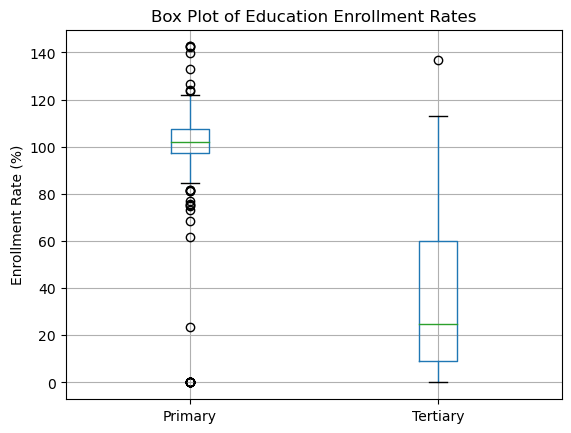

In [125]:
#Enrollment Rates

education_data[['Gross_Primary_Education_Enrollment', 'Gross_Tertiary_Education_Enrollment']].boxplot()
plt.title('Box Plot of Education Enrollment Rates')
plt.ylabel('Enrollment Rate (%)')
plt.xticks([1, 2], ['Primary', 'Tertiary'])
plt.show()

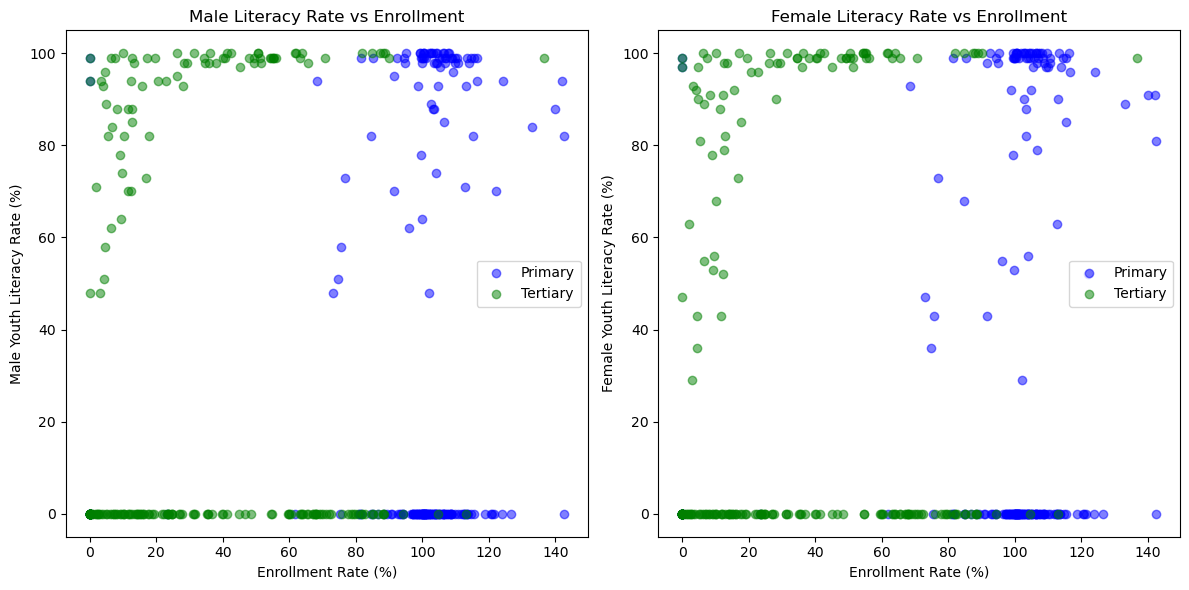

In [129]:
#Scatter Plot

plt.figure(figsize=(12, 6))

# Scatter Plot for Male Literacy Rate
plt.subplot(1, 2, 1)
x1 = education_data['Gross_Primary_Education_Enrollment']
x2 = education_data['Gross_Tertiary_Education_Enrollment'], 
y1 = education_data['Youth_15_24_Literacy_Rate_Male']
y2 = education_data['Youth_15_24_Literacy_Rate_Female']


plt.scatter(x1, y, alpha=0.5, label='Primary', color='blue')
plt.scatter(x2, y, alpha=0.5, label='Tertiary', color='green')
plt.title('Male Literacy Rate vs Enrollment')
plt.xlabel('Enrollment Rate (%)')
plt.ylabel('Male Youth Literacy Rate (%)')
plt.legend()

# Scatter Plot for Female Literacy Rate
plt.subplot(1, 2, 2)
plt.scatter(x1, y2, alpha=0.5, label='Primary', color='blue')
plt.scatter(x2, y2, alpha=0.5, label='Tertiary', color='green')
plt.title('Female Literacy Rate vs Enrollment')
plt.xlabel('Enrollment Rate (%)')
plt.ylabel('Female Youth Literacy Rate (%)')
plt.legend()

plt.tight_layout()
plt.show()


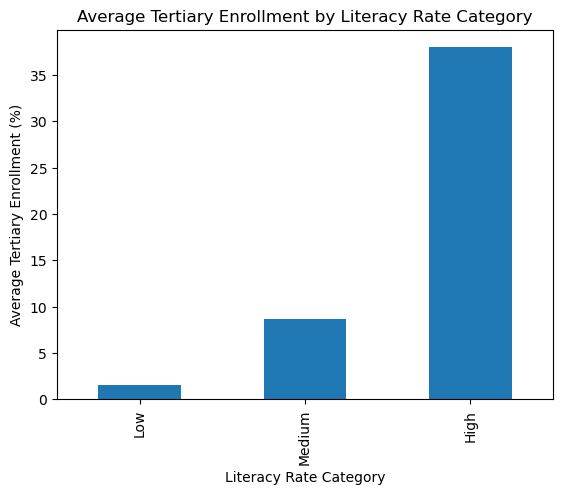

In [131]:
l_c = education_data.groupby('Literacy_Rate_Category')['Gross_Tertiary_Education_Enrollment'].mean()
l_c.plot(kind='bar')
plt.title('Average Tertiary Enrollment by Literacy Rate Category')
plt.xlabel('Literacy Rate Category')
plt.ylabel('Average Tertiary Enrollment (%)')
plt.show()


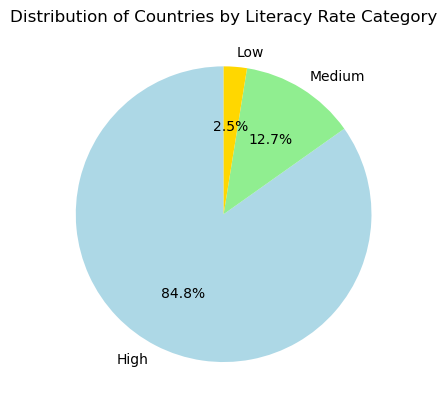

In [133]:
# Assuming 'Literacy_Rate_Category' has been previously created in the dataset
literacy_rate_counts = education_data['Literacy_Rate_Category'].value_counts()

# Creating the pie chart
colors_1 = ['lightblue', 'lightgreen', 'gold']
literacy_rate_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors= colors_1)
plt.title('Distribution of Countries by Literacy Rate Category')
plt.ylabel('')  # Hide the y-label as it's not informative for pie charts
plt.show()
